# Exploratory Data Analysis (EDA):

This dataset provides a list of lyrics from 1950 to 2019 describing music metadata as sadness, danceability, loudness, acousticness, etc. Authors also provide some information as lyrics which can be used to do natural language processing.

Moura, Luan; Fontelles, Emanuel; Sampaio, Vinicius; França, Mardônio (2020), “Music Dataset: Lyrics and Metadata from 1950 to 2019”, Mendeley Data, V3, doi: 10.17632/3t9vbwxgr5.3

https://www.kaggle.com/datasets/saurabhshahane/music-dataset-1950-to-2019/data

## Musical Data Understanding and Genre Predictions (1950-2019):


In [7]:
print(df.columns)

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age'],
      dtype='object')


Shape of Data: (28372, 31)
Missing values:
genre           0
danceability    0
energy          0
valence         0
dtype: int64
Model Accuracy: 0.41
Classification Report:
              precision    recall  f1-score   support

       blues       0.36      0.28      0.32       921
     country       0.41      0.54      0.46      1089
     hip hop       0.55      0.43      0.48       181
        jazz       0.47      0.37      0.41       769
         pop       0.37      0.45      0.41      1408
      reggae       0.49      0.41      0.45       500
        rock       0.43      0.33      0.37       807

    accuracy                           0.41      5675
   macro avg       0.44      0.40      0.41      5675
weighted avg       0.41      0.41      0.41      5675



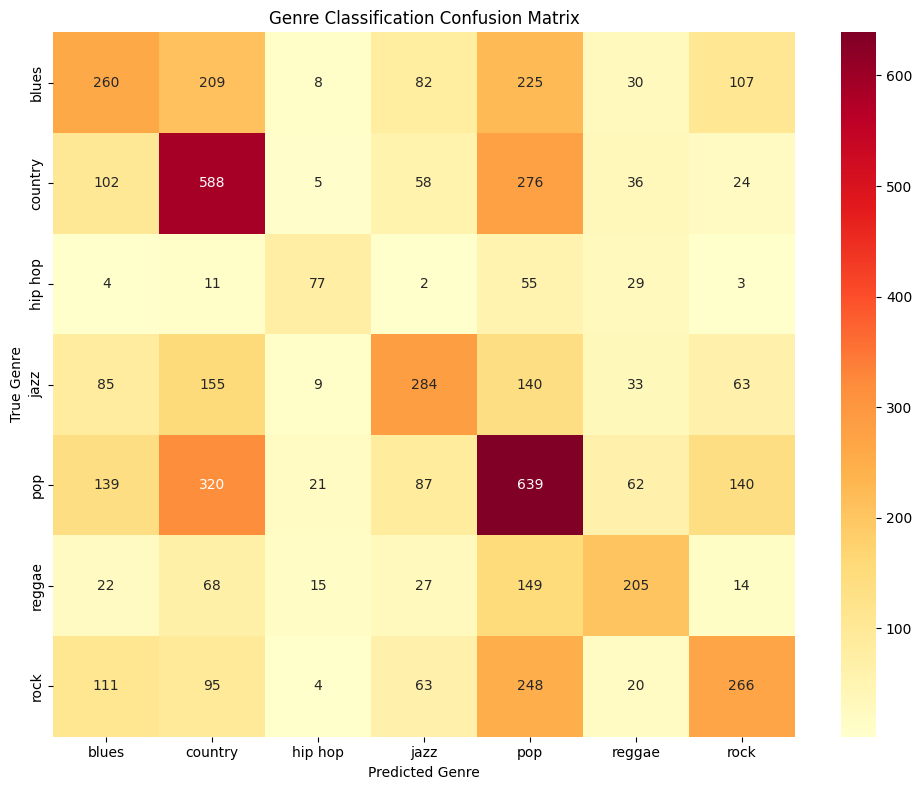

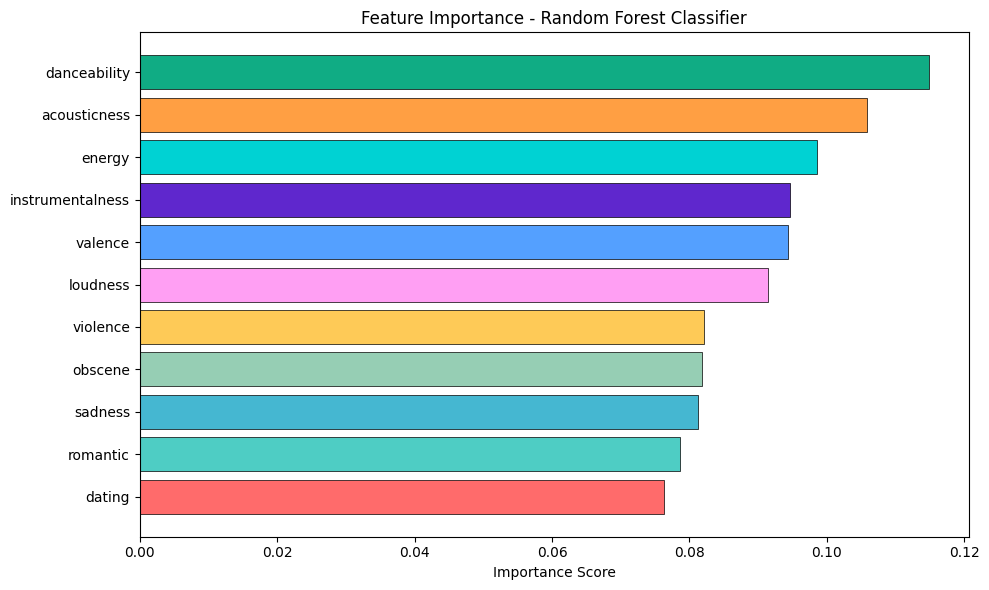

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# data loaded

df = pd.read_csv("tcc_ceds_music.csv")


print(f"Shape of Data: {df.shape}")  # rows/columns

# missing values check

print("Missing values:")
print(
    df[["genre", "danceability", "energy", "valence"]].isnull().sum()
)  # counting and summing up empty/missing areas

# genres for classification

major_genres = ["pop", "rock", "jazz", "hip hop", "country", "reggae", "blues"]
df_2 = df[df["genre"].isin(major_genres)].copy()  # new data frame to manipulate

# features used to predict genre of a song

feature_columns = [
    "danceability",
    "loudness",
    "acousticness",
    "instrumentalness",
    "valence",
    "energy",
    "dating",
    "violence",
    "romantic",
    "obscene",
    "sadness",
]

input = df_2[
    feature_columns
]  # storing features for input that the model can learn from
output = df_2["genre"]  # target labeling info that the model must predict

# splitting the data for 80/20 train/test compilation

input_train, input_test, output_train, output_test = train_test_split(
    input, output, test_size=0.2, stratify=output
)

# training model

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(
    input_train, output_train
)  # fit the random forest model to the training data so that it can learn patterns

# predict genre

output_prediction = rf_model.predict(
    input_test
)  # begins predicting genre for input set of feature columns

# accuracy score

accuracy = accuracy_score(
    output_test, output_prediction
)  # compares predictions for genre with what genre labels for each song actually were
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(
    classification_report(output_test, output_prediction)
)  # showcasing performance metrics for each genre analyzed

"""
Precision: How many predicted as X were actually X (Reliability)
Recall: How many actual X were correctly predicted as X (Validity)
F1-Score: Balance between precision and recall
Support: Number of samples for each genre 
"""

# confusion matrix heatmap to display correct and incorrect predictions

plt.figure(figsize=(10, 8))
heatmap_cm = confusion_matrix(
    output_test, output_prediction
)  # predictions on the diagonal are correct, but predictions off of the diagonal are incorrect errors
sns.heatmap(
    heatmap_cm,
    annot=True,
    fmt="d",
    cmap="YlOrRd",  # display numbers as integers (no floating point values) with color scheming
    xticklabels=rf_model.classes_,
    yticklabels=rf_model.classes_,
)  # tick mark labeling corresponding to genres (classes)
plt.title("Genre Classification Confusion Matrix")
plt.xlabel("Predicted Genre")
plt.ylabel("True Genre")
plt.tight_layout()
plt.show()

# horizontal bar chart to see how much importance each feature had in calculation

plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame(
    {  # creating dataframe for storage
        "feature": feature_columns,  # names for each feature
        "importance": rf_model.feature_importances_,  # ranking model's feature importance with scoring (sums up to be 1.0 in total)
    }
).sort_values("importance", ascending=True)

colors = [
    "#FF6B6B",
    "#4ECDC4",
    "#45B7D1",
    "#96CEB4",
    "#FECA57",
    "#FF9FF3",
    "#54A0FF",
    "#5F27CD",
    "#00D2D3",
    "#FF9F43",
    "#10AC84",
]

plt.barh(
    feature_importance["feature"],
    feature_importance["importance"],
    color=colors,
    linewidth=0.5,
    edgecolor="black",
)  # Y - X mapping for variables (horizontal)
plt.title("Feature Importance - Random Forest Classifier")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [2]:
# most common misclassification patterns (commonly confused w# indices of the test set to link back to original data

test_indices = input_test.index  # original row indices from df_2

# results DataFrame (actual vs predicted)

detailed_results = pd.DataFrame({
    'actual_genre': output_test, # true genre labels 
    'predicted_genre': output_prediction, # model predictions 
    'is_correct': (output_test == output_prediction) # true if correct, false if wrong
}, index=test_indices)

# assign song detail columns for analysis (if available for each song)

available_columns = [col for col in ['artist_name', 'track_name', 'release_date', 'lyrics'] if col in df_2.columns]
print(f"Available song detail columns: {available_columns}")

if available_columns: # getting song details from dataset

    song_details = df_2[available_columns]
    
    # merging song details with model's genre prediction results
    
    detailed_results = detailed_results.merge(
        song_details, 
        left_index=True, # index from left DataFrame (detailed_results)
        right_index=True, # index from right DataFrame (song_details)
        suffixes=('', '_original') # suffix for overlapping column names 
    )
    
    # getting misclassified songs
    
    misclassified_songs = detailed_results[~detailed_results['is_correct']]
    
    print(f"\nTotal misclassified songs: {len(misclassified_songs)}")
    print(f"Misclassification rate: {len(misclassified_songs)/len(input_test):.2%}")
    
    # top misclassified songs
    
    print("\nTop 15 Misclassified Songs:")

    
    for song_number, (index, row) in enumerate(misclassified_songs.head(15).iterrows()):
        print(f"{song_number+1:2d}. ", end="")
        
        if 'artist_name' in row:
            artist = str(row['artist_name'])[:25]  # truncate to 25 characters
            print(f"Artist: {artist:<25}", end="") # new line with left-aligned padding to 25 width for each artist (proper spacing) 
        
        if 'track_name' in row:
            track = str(row['track_name'])[:35]  # truncate to 35 characters
            print(f"Track: {track:<35}", end="") # new line with left-aligned padding to 35 width for each track (better space)
        
      
        print(f"Actual: {row['actual_genre']:>8} --> Predicted: {row['predicted_genre']:>8}") # right-aligned padding to 8 width for better spacing in output
        
        # key 'audio' features that might explain the misclassification
        
        if index in input_test.index: # if index exists get the values/features of that song index and print them
            song_features = input_test.loc[index]
            print(f"     Features - Dance: {song_features['danceability']:.2f}, "
                  f"Energy: {song_features['energy']:.2f}, "
                  f"Acoustic: {song_features['acousticness']:.2f}, "
                  f"Valence: {song_features['valence']:.2f}")
        print("\n")
    
    print("\nMost Common Misclassification Patterns:")

    confusion_patterns = pd.crosstab(misclassified_songs['actual_genre'], 
                                   misclassified_songs['predicted_genre'])
    print(confusion_patterns) # cross tabulation frequency table (matrix) being produced to show number of songs actually apart of a certain genre being predicted as such 
    
    # actual vs predicted
    # genres most confused by model
    
    print("\nTop Genre Confusion Pairs:")
   
    confusion_pairs = [] # empty list to store the confused genre pairs 
    for actual_genre in confusion_patterns.index:
        for predicted_genre in confusion_patterns.columns:
            if actual_genre != predicted_genre: # for genres in nested loop, if actual genre doesn't equal predicted genre, assign the result to a count and append the outcome as a flawed pair
                count = confusion_patterns.loc[actual_genre, predicted_genre] # getting value at the intersection of predicted genre rows and actual genre columns to see how many were misclassified 
                confusion_pairs.append((actual_genre, predicted_genre, count))
    
    # sorting by frequency (count -- 3rd element of list) and showing top 5 confusion pairs in descending order
    
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    for number, (actual, predicted, count) in enumerate(confusion_pairs[:5]):
        print(f"{number+1}. {actual} --> {predicted}: {count} songs")
        
else: # if some details weren't present print that and showcase what is present in dataframe
    print("No song detail columns found in the dataset.")
    print("Available columns:", df_2.columns.tolist())

Available song detail columns: ['artist_name', 'track_name', 'release_date', 'lyrics']

Total misclassified songs: 3343
Misclassification rate: 58.91%

Top 15 Misclassified Songs:
 1. Artist: sister rosetta tharpe    Track: fly away                           Actual:    blues --> Predicted:      pop
     Features - Dance: 0.49, Energy: 0.88, Acoustic: 0.77, Valence: 0.71


 2. Artist: max roach                Track: living room                        Actual:     jazz --> Predicted:    blues
     Features - Dance: 0.29, Energy: 0.49, Acoustic: 0.62, Valence: 0.31


 3. Artist: rex orange county        Track: loving is easy                     Actual:      pop --> Predicted:   reggae
     Features - Dance: 0.75, Energy: 0.61, Acoustic: 0.22, Valence: 0.53


 4. Artist: julian marley            Track: on the floor                       Actual:   reggae --> Predicted:      pop
     Features - Dance: 0.91, Energy: 0.67, Acoustic: 0.02, Valence: 0.81


 5. Artist: michael w. smith         Tra


Gradient Boosting Model Accuracy:
0.42

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

       blues       0.38      0.30      0.34       921
     country       0.42      0.57      0.48      1089
     hip hop       0.51      0.49      0.50       181
        jazz       0.49      0.37      0.43       769
         pop       0.38      0.43      0.40      1408
      reggae       0.47      0.46      0.46       500
        rock       0.44      0.33      0.38       807

    accuracy                           0.42      5675
   macro avg       0.44      0.42      0.43      5675
weighted avg       0.42      0.42      0.42      5675



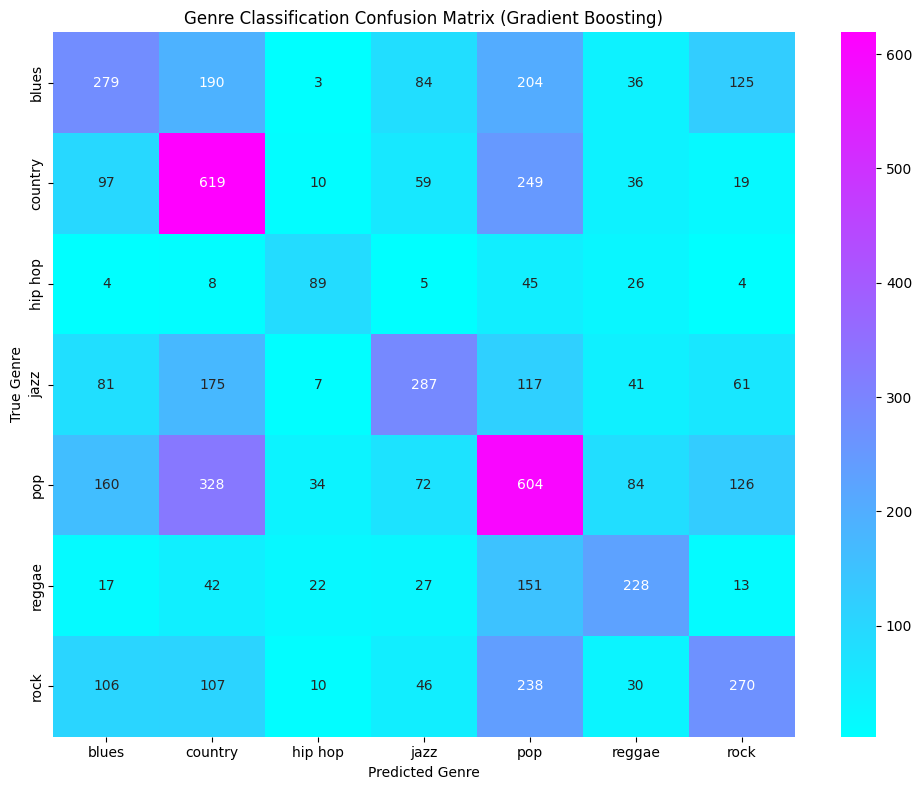

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


gradientBoost_model = GradientBoostingClassifier( # new gradient boosting model with previous parameters
    n_estimators=200, # number of boosting stage trees
    learning_rate=0.05, # learning rate controlling how much each tree contributes, small value of 0.05 reduces overfitting but requires more trees
    max_depth=3, # max depth of each individual decision tree, with shallow trees reducing overfitting and improving generalization
)

gradientBoost_model.fit(input_train, output_train) # training/fitting the model for the given data

gradientBoost_predictions = gradientBoost_model.predict(input_test) # predicting genres using model made

gradientBoost_accuracy = accuracy_score(output_test, gradientBoost_predictions) # proportion of correct predictions out of all predictions 

print("\nGradient Boosting Model Accuracy:")
print(f"{gradientBoost_accuracy:.2f}")

print("\nGradient Boosting Classification Report:")
print(classification_report(output_test, gradientBoost_predictions))

# confusion matrix for gradient boosting

plt.figure(figsize=(10, 8))
gb_cm = confusion_matrix(output_test, gradientBoost_predictions) # comparing true/actual vs predicted labels using matrix

sns.heatmap(
    gb_cm,
    annot=True, # displaying counts
    fmt='d', # formatting numbers as integers
    cmap='cool', # cooler contrasting color palette from earlier
    xticklabels=gradientBoost_model.classes_,
    yticklabels=gradientBoost_model.classes_
    # tick mark for genres on x and y axis
)

plt.title('Genre Classification Confusion Matrix (Gradient Boosting)')
plt.xlabel('Predicted Genre')
plt.ylabel('True/Actual Genre')
plt.tight_layout()
plt.show()


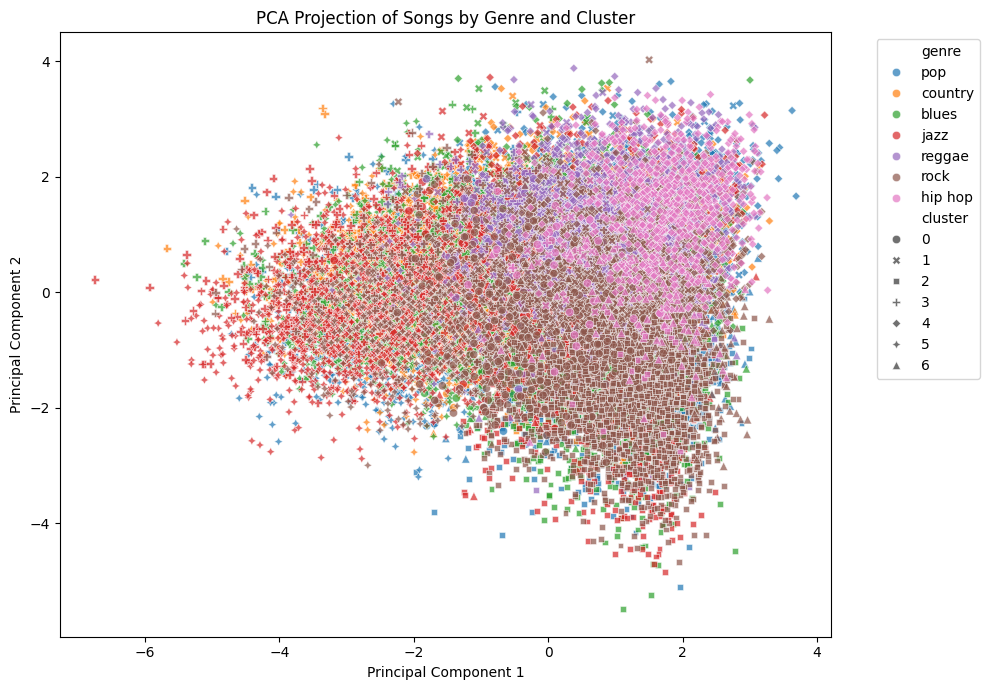


Cluster vs Genre Distribution:
genre    blues  country  hip hop  jazz   pop  reggae  rock
cluster                                                   
0          626     1114       39   336  1316     268   673
1          859     1002       43   526  1309     777   508
2          915      255       16   431   959      78  1479
3          354      415        4   352   494      60   154
4          498      579      703   542  1157     653   356
5          827     1665        3  1347  1165      58   446
6          525      415       96   311   642     604   418


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

scaler = StandardScaler() # scaling all features for equal contribution through standardization
scaled_features = scaler.fit_transform(input)

# number of clusters equal to number of genres

kmeans = KMeans(n_clusters=len(major_genres)) # k-means clustering 
clusters = kmeans.fit_predict(scaled_features) # fit k-means to scaled data and assign each song to a cluster

df_2['cluster'] = clusters # storing cluster assignments 

# dimensionality reduction for visualization

pca = PCA(n_components=2) # reducing data to 2 principal components (2 dimensions)
pca_features = pca.fit_transform(scaled_features) # scaled feature space transformed to fit into 2 principal components

df_2['pca_1'] = pca_features[:, 0] # storing 2 components into dataframe prior to plotting 
df_2['pca_2'] = pca_features[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_2, 
    x='pca_1', 
    y='pca_2',
    hue='genre', # color points by genre
    style='cluster', # marker style based on cluster assignment 
    alpha=0.7
)

plt.title('PCA Projection of Songs by Genre and Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # legend
plt.tight_layout()
plt.show()

# cluster vs genre distribution

cluster_genre_table = pd.crosstab(df_2['cluster'], df_2['genre']) # cross-tabulation showing how genres are distributed across clusters 
print("\nCluster vs Genre Distribution:")
print(cluster_genre_table) # cluster-genre frequency table (matrix)

